In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

In [2]:
data = pd.read_csv('/Users/ilanman/Duke/STA832/project/code/ml-latest-small/ratings.csv')

In [3]:
data.shape

(100004, 4)

In [4]:
Y = data.iloc[:,0:3]

In [5]:
Y = Y.pivot_table(index='userId', columns = 'movieId', values='rating', fill_value=0)

In [6]:
Y1 = Y

In [7]:
Y1

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,4.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
7,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,3.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0
9,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0,0,0


In [8]:
# calculate sparsity of ratings matrix
sum(np.where(Y1>0)[0])/(Y1.shape[0]*Y1.shape[1])

5.6881289158523867

In [9]:
def RMSE(Rvec_full, overall_mean, item_addback, user_addback, P, Q, subset):
    """
    Returns prediction matrix and Root Mean Squared Error on a subset of data (usually training or testing set)
    """
    
    pred_mat = overall_mean + item_addback + user_addback + P.dot(Q)
    
    actual = Rvec_full[subset]
    pred = pred_mat.ravel()[subset]
    n = len(actual)
    
    return [pred_mat, pred, np.sqrt(sum((actual - pred)**2)/n)]

In [10]:
def get_biases(R,N,M,):
    
    # initialize random vectors. Solve these for user and item specific bias
    user_bias = np.random.rand(N,1)
    item_bias = np.random.rand(M,1)

    overall_mean = np.mean(R)
    
    return [user_bias, item_bias, overall_mean]

In [11]:
def create_data_subsets(R,N,M):
    
    # create training set

    Rvec_full = R.ravel()
    Rvec_test = R.ravel()

    act = np.where(Rvec_test>0)[0]
    n = len(act)
    mask = np.random.rand(n) < 0.66
    train = act[mask]
    test = act[~mask]
    
    # zero out known ratings
    Rvec_test[test]=0
    
    # New R has zero'ed out elements
    R_test = Rvec_test.reshape(N,M)
    
    return [R_test, Rvec_full, Rvec_test, train, test]

In [12]:
def initialize_matrices(Y,K):
    
    R = Y.values

    N = R.shape[0]
    M = R.shape[1]

    P = np.random.rand(N,K)
    Q = np.random.rand(M,K)
    Q = Q.T
    
    return [R, P, Q, N, M]

In [14]:
errors = {}
results = {}

max_runs = 30
eta = 0.01
reg = 0.01
threshold = 0.01

for K in [2, 5, 10, 20, 50]:
    print "Number of Latent Factors:", K
    results[K] = {}
    errors[K] = np.zeros(max_runs),     

    # initialize user and item matrices
    R, P, Q, N, M = initialize_matrices(Y1, K)
    
    # split ratings matrix into training and testing
    R_test, Rvec_full, Rvec_test, train, test = create_data_subsets(R, N, M)
    
    # find biases based on testing set
    user_bias, item_bias, overall_mean = get_biases(R_test, N, M)

    # Run Stochastic Gradient Descent Algorithm

    for r in range(max_runs):

        if r % 10 == 0:
            print "Starting run:", r

        # for every user
        for i in range(N):

            # for every item
            # [i,j] is the [user,item]
            for j in range(M):
                if R_test[i,j] > 0:

                    # find the error of this element
                    # remove user and item biases
                    R_hat = overall_mean + user_bias[i] + item_bias[j] + P[i,:].dot(Q[:,j])
                    e_ij = R_test[i,j] - R_hat

                    # update user and item bias vectors
                    item_bias[j] += eta*(e_ij - reg * item_bias[j])
                    user_bias[i] += eta*(e_ij - reg * user_bias[i])

                    # iterate over number of latent factors, K
                    for k in range(K):  

                        # update P and Q with new entry
                        Q[k,j] += eta*(e_ij*P[i,k] - reg * Q[k,j])
                        P[i,k] += eta*(e_ij*Q[k,j] - reg * P[i,k])                

        # calculate total error to see
        e=0    

        for i in range(N):
            for j in range(M):
                if R_test[i,j] > 0:
                    e = e + (R_test[i,j] - overall_mean - user_bias[i] - item_bias[j] - np.dot(P[i,:],Q[:,j]))**2
                    e = e + (reg/2) * (item_bias[j]**2 + user_bias[i])**2
                    for k in xrange(K):
                        e = e + (reg/2) * (P[i,k]**2 + Q[k,j]**2)

        errors[K][0][r] = e
#         if abs(errors[K][0][r] - errors[K][0][r-1]) < threshold:
#             print "Converged after {} iterations".format(r)
#             print "MSE:", np.round(e[0],2)
#             break

        if r % 10 == 0:
            print "Finished run"
    
    item_addback = np.tile(item_bias,N).T
    user_addback = np.repeat(user_bias,M).reshape(N,M) 
    
    pred_mat, pred_test, rmse_test = RMSE(Rvec_full, overall_mean, item_addback, user_addback, P, Q, test)
    pred_mat, pred_train, rmse_train = RMSE(Rvec_full, overall_mean, item_addback, user_addback, P, Q, train)
    
    results[K]['pred_mat'] = pred_mat
    results[K]['pred_train'] = pred_train
    results[K]['pred_test'] = pred_test
    results[K]['rmse_train'] = rmse_train
    results[K]['rmse_test'] = rmse_test
    

Number of Latent Factors: 2
Starting run: 0
Finished run
Starting run: 10
Finished run
Starting run: 20
Finished run
Number of Latent Factors: 5
Starting run: 0
Finished run
Starting run: 10
Finished run
Starting run: 20
Finished run
Number of Latent Factors: 10
Starting run: 0
Finished run
Starting run: 10
Finished run
Starting run: 20
Finished run
Number of Latent Factors: 20
Starting run: 0
Finished run
Starting run: 10
Finished run
Starting run: 20
Finished run
Number of Latent Factors: 50
Starting run: 0
Finished run
Starting run: 10
Finished run
Starting run: 20
Finished run


In [19]:
results

{2: {'pred_mat': array([[ 2.35851127,  2.14899234,  1.8972055 , ...,  2.85136689,
           1.71102814,  2.60808452],
         [ 3.73178377,  3.40702835,  3.05204166, ...,  4.11476726,
           2.98529265,  4.10291941],
         [ 3.56259637,  3.16889234,  2.68843951, ...,  3.8968125 ,
           2.71831111,  3.8978331 ],
         ..., 
         [ 3.73436904,  3.00720194,  1.74755329, ...,  3.87864321,
           2.31280126,  3.60208116],
         [ 3.37091293,  3.23371115,  3.13984979, ...,  3.90790559,
           2.84193332,  3.7030272 ],
         [ 3.70625431,  3.3217089 ,  2.88047022, ...,  4.04094264,
           2.88860278,  4.08470099]]),
  'pred_test': array([ 1.9700824 ,  2.37158461,  2.32381052, ...,  4.00602914,
          3.91754445,  3.13203029]),
  'pred_train': array([ 2.33060924,  2.97874566,  2.40395639, ...,  3.38943987,
          4.01081207,  3.76879375]),
  'rmse_test': 0.93506104660440892,
  'rmse_train': 0.76684408453587261},
 5: {'pred_mat': array([[ 2.44080264,

In [20]:
rmse_train_vec = []
rmse_test_vec = []
for key in sorted(results.iterkeys()):
    rmse_train_vec.append(results[key]['rmse_train'])
    rmse_test_vec.append(results[key]['rmse_test'])


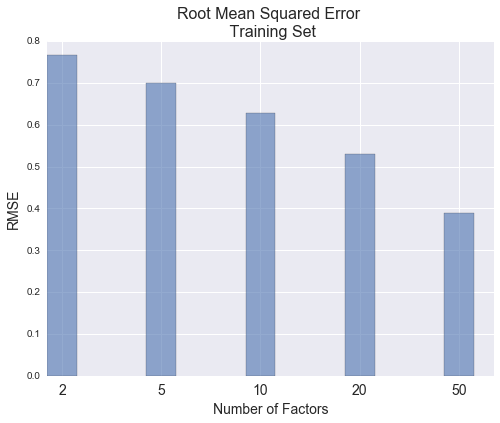

In [21]:
labels = [2,5,10,20,50]
width=0.3
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(range(5), rmse_train_vec, width, alpha=0.6)
ax.set_title("Root Mean Squared Error \n Training Set", size=16)
ax.set_xticklabels(labels, size=14)
ax.set_xticks(np.arange(5)+width/2)
ax.set_ylabel("RMSE",size=14)
ax.set_xlabel("Number of Factors",size=14)
ax.xaxis
pass

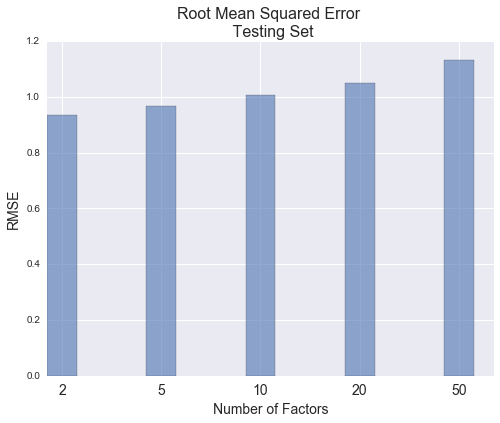

In [22]:
labels = [2,5,10,20,50]
width=0.3
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(range(5), rmse_test_vec, width, alpha=0.6)
ax.set_title("Root Mean Squared Error \n Testing Set", size=16)
ax.set_xticklabels(labels, size=14)
ax.set_xticks(np.arange(5)+width/2)
ax.set_ylabel("RMSE",size=14)
ax.set_xlabel("Number of Factors",size=14)
ax.xaxis
pass

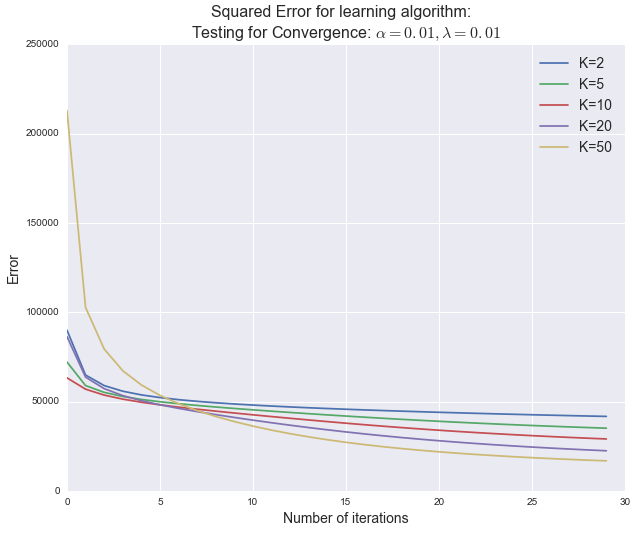

In [23]:
plt.figure(figsize=(10,8))
plt.plot(errors[2][0].T)
plt.plot(errors[5][0].T)
plt.plot(errors[10][0].T)
plt.plot(errors[20][0].T)
plt.plot(errors[50][0].T)
plt.title(r"Squared Error for learning algorithm:  "
          "\nTesting for Convergence: "
          r"$ \alpha=0.01, \lambda = 0.01$",size=16)
plt.ylabel("Error",size=14)
plt.xlabel("Number of iterations",size=14)
plt.legend(labels=['K=2','K=5','K=10','K=20','K=50'],fontsize=14)
plt.show()

In [24]:
# Investigate single user - bad example

In [44]:
# User 3 rated the following movies highly (at least rating of 4)
userid = 250
user_rated = Y1.iloc[userid,:]
highly_rated = np.where(user_rated>=4.5)[0]
print highly_rated[::5]

[ 232 1024 1813 2476 3999 4686 5380 6026 6463 7212 7502 7962 8357 8563]


In [41]:
# this user highly rated Sudden Death and Twelve Monkeys. This user enjoys action movies from the 90s

In [42]:
pred = results[2]['pred_mat'][userid]

In [43]:
highly_rated_predictions = np.where(pred>=4.5)[0]
highly_rated_predictions

array([  25,   48,   54,   55,   74,   89,  101,  105,  125,  141,  150,
        157,  171,  187,  189,  205,  217,  218,  236,  266,  274,  276,
        277,  284,  285,  306,  312,  327,  352,  359,  435,  448,  461,
        472,  478,  482,  492,  506,  507,  525,  530,  532,  535,  553,
        554,  575,  578,  580,  594,  609,  619,  622,  626,  632,  651,
        659,  669,  691,  695,  703,  705,  716,  719,  720,  724,  725,
        726,  728,  729,  733,  734,  737,  743,  746,  747,  748,  753,
        756,  760,  762,  770,  771,  773,  774,  779,  786,  790,  802,
        827,  855,  858,  862,  880,  900,  912,  915,  916,  923,  931,
        934,  937,  951,  953,  954,  955,  956,  958,  960,  961,  963,
        965,  968,  973,  975,  977,  978,  979,  980,  983,  984,  985,
        988,  989,  992,  997,  998, 1001, 1002, 1004, 1006, 1007, 1008,
       1013, 1014, 1016, 1030, 1034, 1035, 1038, 1042, 1052, 1056, 1057,
       1058, 1085, 1104, 1106, 1147, 1173, 1177, 11